<a href="https://colab.research.google.com/github/splenwilz/Predicting-Oil-Production-in-Field-X-in-the-Niger-Delta-using-Artificial-Neural-Network/blob/main/SCRIPTS/KNeighborsRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'train_score': 87.26717246875448, 'test_score': 76.5503077827611, 'forecast_set': array([145.21 , 233.756, 219.31 , 145.21 , 280.056, 221.06 , 138.284,
       137.908, 231.512, 288.358])}
RMSE TEST:  647.1547256974503
RMSE Train:  483.9330489521877
 Mean Squared Error (MSE)  :   418809.23899254214
 Mean Absolute  Error  :   319.18267174925876
 R Squared  :  0.765503077827611
 Accuracy: 76.550%
KNeighborsRegressor()


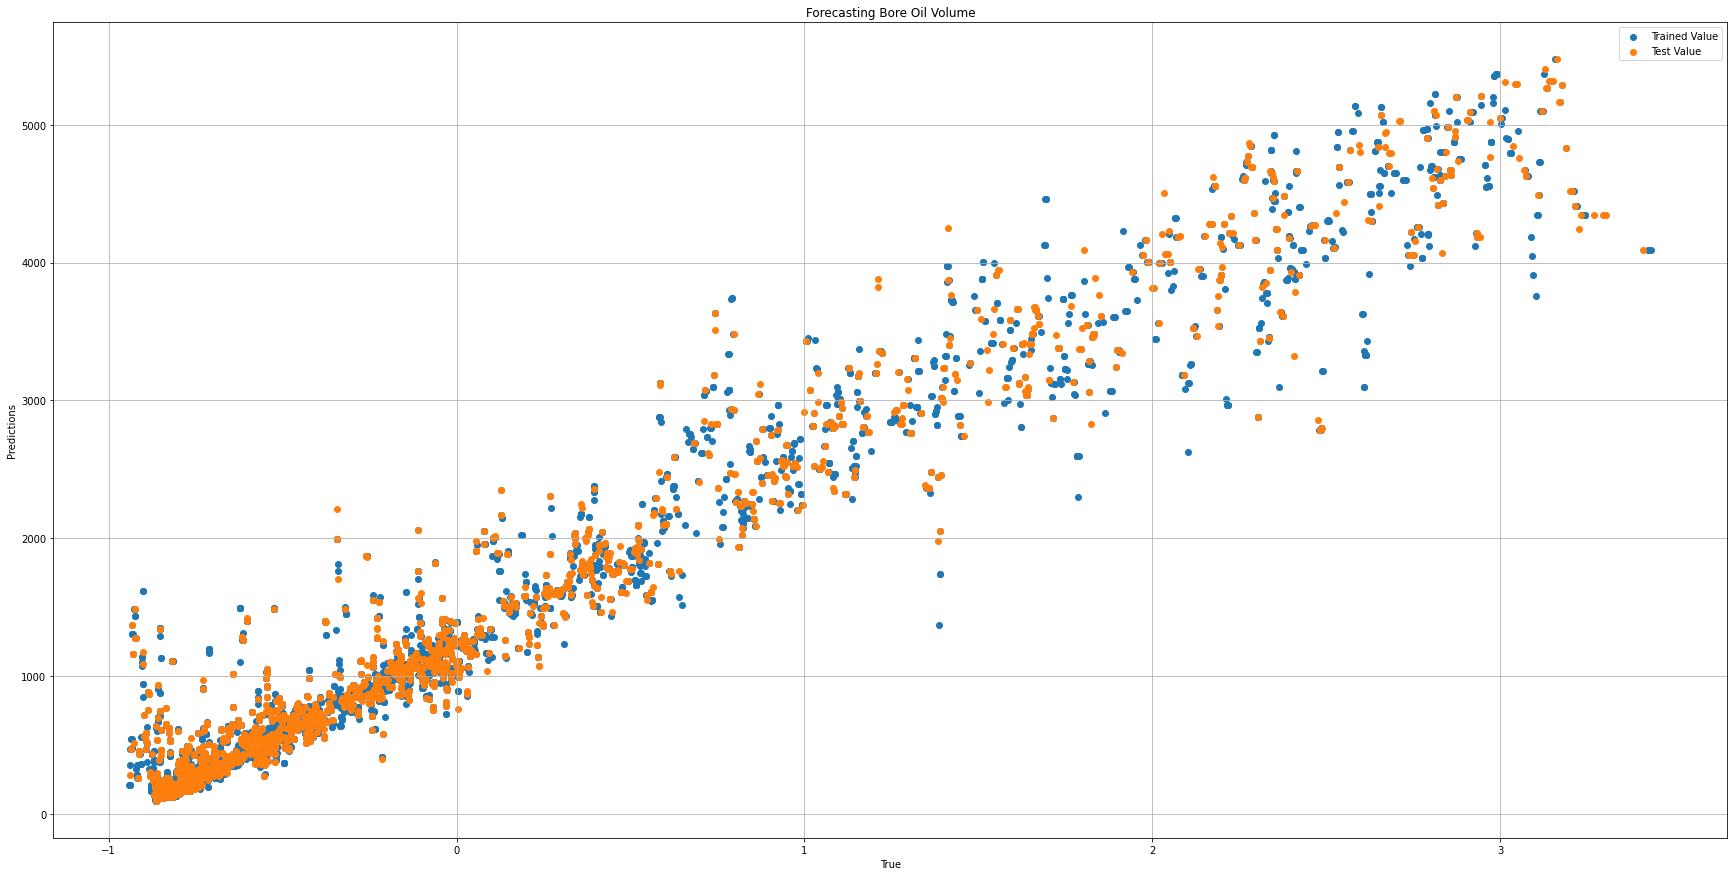

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Dec 25 04:46:52 2022

@author: Godswill William
"""

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing;
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import ElasticNet
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR





from  sklearn.model_selection  import train_test_split 
from sklearn import metrics


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out);#creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]); #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True); #dropping na values
    df.index = df.DATEPRD
    df.drop('DATEPRD', axis=1, inplace=True)
    df.index = df.NPD_WELL_BORE_CODE
    df.drop('NPD_WELL_BORE_CODE', axis=1, inplace=True)
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size) #cross validation 

    response = [X_train,X_test , Y_train, Y_test , X_lately];
    return response;





url = 'https://raw.githubusercontent.com/splenwilz/Predicting-Oil-Production-in-Field-X-in-the-Niger-Delta-using-Artificial-Neural-Network/main/DATASET/final_vpd.csv'
df = pd.read_csv(url, index_col=0)




forecast_col = 'BORE_OIL_VOL'#choosing which column to forecast
forecast_out = 10 #how far to forecast 
test_size = 0.3; #the size of my test set

X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in

#learner = KNeighborsRegressor(); #initializing  regression model
learner = KNeighborsRegressor()



learner.fit(X_train,Y_train); #training the  model
score=learner.score(X_train,Y_train)
score2=learner.score(X_test,Y_test);#testing  model
predictions_test = learner.predict(X_test)
predictions_train = learner.predict(X_train)

forecast= learner.predict(X_lately); #set that will contain the forecasted data
response={};#creting json object
response['train_score']=score*100;
response['test_score']=score2*100; 
response['forecast_set']=forecast;

print(response);


# Calculate the root mean square error (RMSE) for test and training data
N = len(Y_test)
rmse_test = np.sqrt(np.sum((np.array(Y_test).flatten() - np.array(predictions_test).flatten())**2)/N)
print("RMSE TEST: ", rmse_test)

N = len(Y_train)
rmse_train = np.sqrt(np.sum((np.array(Y_train).flatten() - np.array(predictions_train).flatten())**2)/N)
print("RMSE Train: ", rmse_train)

# Calculate the mean square error (MSE) 
MSE = metrics.mean_squared_error(Y_test, predictions_test)
print( " Mean Squared Error (MSE)  :  " , MSE)

# Calculate the Mean Absolute  Error (MAE) 
MAE = metrics.mean_absolute_error(Y_test, predictions_test)
print( " Mean Absolute  Error  :  " , MAE)


# Calculate the Mean Absolute  Error (MAE) 
rSquared = metrics.r2_score(Y_test, predictions_test, multioutput='variance_weighted')
print( " R Squared  : " , rSquared)


result = learner.score(X_test, Y_test)
print((" Accuracy: %.3f%%") % (result*100.0))
print(learner)

import matplotlib.pyplot as plt

plt.figure(figsize = (30, 15))
plt.scatter(X_train,predictions_train, label='Trained Value')
plt.scatter(X_test,predictions_test,label='Test Value')
plt.title('Forecasting Bore Oil Volume')
plt.xlabel('True' )
plt.ylabel('Predictions')
plt.grid(True)
plt.legend()
plt.savefig('KNN.png')
plt.show()
#df['Total flow'].plot()
#plt.scatter(X_train,Y_train)
#plt.show()

